In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')


df=pd.read_csv("C:\ML\dataset_task1.csv")

# we dont need customerid 
df=df.drop(columns=['customerID'])

#checking the datatypes of the columns
print(df.dtypes)
print(df.describe())
print(df.info())

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72

Totalcharges is object of object datatype, but directly converting it into float gives us a error

In [11]:

df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)
df=df.dropna(subset=['TotalCharges'],axis=0)
df['TotalCharges']=df['TotalCharges'].astype(float)

df.head(20)



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No



No internet service is getting repeated in 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' 
which are leading to data redundancy


Similarly no phone service is getting repeated in 'MultipleLines' column even tough we have already consider it in a seperate 'PhoneService' column

In [12]:
#No internet
 
No_internet_containing_columns=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for c in No_internet_containing_columns:
    df[c]=df[c].replace('No internet service','No')



#No phone service
df['MultipleLines']=df['MultipleLines'].replace('No phone service','No')



df.head(20)



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Performing encoding on columns

In [13]:
#encoding
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler


ohe=OneHotEncoder(sparse_output=False)


scalar=StandardScaler()
yes_no_cols = ['Partner', 'Dependents', 'PhoneService','MultipleLines', 'PaperlessBilling','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Churn']
multi_cat_cols = ['InternetService', 'Contract', 'PaymentMethod']
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
ode=OrdinalEncoder(categories=[['No','Yes']] * len(yes_no_cols))
ode2=OrdinalEncoder(categories=[['Female','Male']])
#drop=first is used to prevent multicollinarity
ct=make_column_transformer(
    (ode,yes_no_cols),
    (ode2,['gender']),
    (ohe,multi_cat_cols),
    (scalar,numerical_cols),
    remainder='passthrough'
)
ct.set_output(transform='pandas')
transformed_df=ct.fit_transform(df)


#handling column names
strings_to_remove=['ordinalencoder-1__','ordinalencoder-2__','onehotencoder__InternetService_','onehotencoder__Contract_','onehotencoder__PaymentMethod_','standardscaler__','remainder__']
pattern='|'.join(strings_to_remove)
transformed_df.columns = transformed_df.columns.str.replace(pattern, '', regex=True)
transformed_df.columns = transformed_df.columns.str.replace('No','No_internet')



Checking correlation between columns and dropping the once with low correlation with 'Churn'


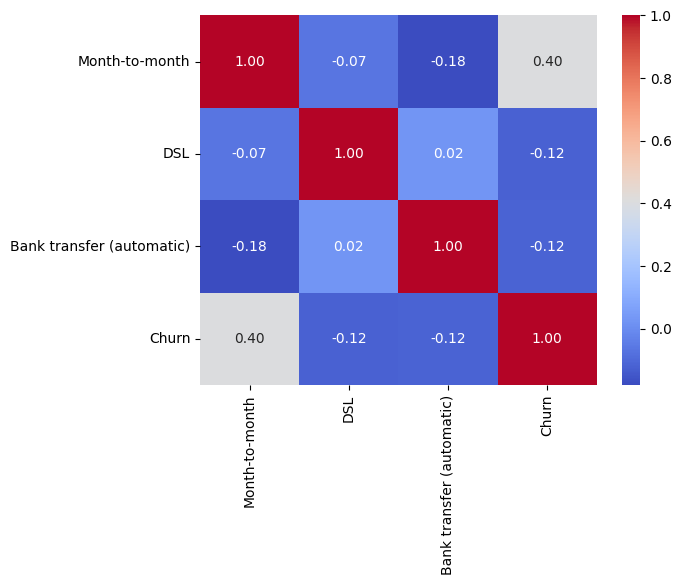

Churn                        1.000000
Month-to-month               0.404565
Fiber optic                  0.307463
Electronic check             0.301455
MonthlyCharges               0.192858
PaperlessBilling             0.191454
SeniorCitizen                0.150541
StreamingTV                  0.063254
StreamingMovies              0.060860
MultipleLines                0.040033
PhoneService                 0.011691
gender                      -0.008545
DeviceProtection            -0.066193
OnlineBackup                -0.082307
Mailed check                -0.090773
Bank transfer (automatic)   -0.118136
DSL                         -0.124141
Credit card (automatic)     -0.134687
Partner                     -0.149982
Dependents                  -0.163128
TechSupport                 -0.164716
OnlineSecurity              -0.171270
One year                    -0.178225
TotalCharges                -0.199484
No_internet                 -0.227578
Two year                    -0.301552
tenure      

In [14]:
#checking correlation
sample_df=transformed_df.loc[:,['Month-to-month','DSL','Bank transfer (automatic)','Churn']]
corr_checking_df=sample_df.corr()
sns.heatmap(corr_checking_df,annot=True,cmap='coolwarm',fmt='.2f',xticklabels=corr_checking_df.columns,yticklabels=corr_checking_df.columns)
plt.show()

corr_matrix=transformed_df.corr(method='pearson')
target_corr=corr_matrix['Churn'].sort_values(ascending=False)
print(target_corr)


#Removing columns that have correlation less than 0.1 with target_variable(Churn)
transformed_df=transformed_df.drop(columns=['gender','PhoneService','MultipleLines','Mailed check','DeviceProtection','OnlineBackup','StreamingTV', 'StreamingMovies'])




Spliting the dataset 

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64


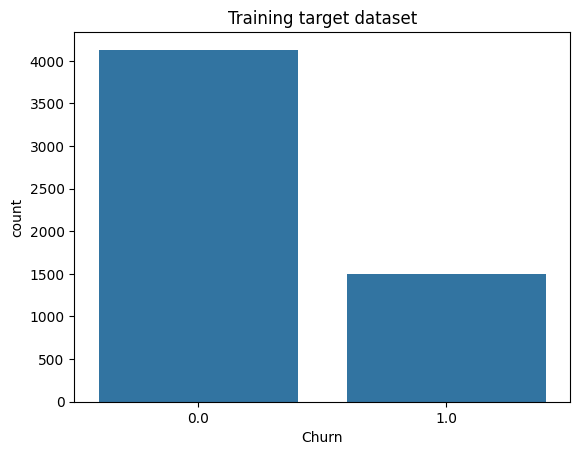

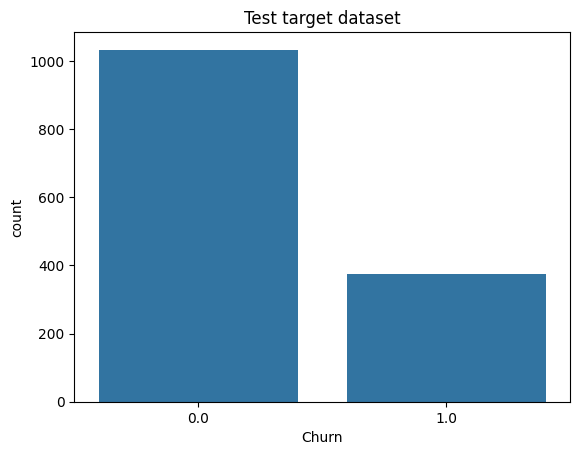

In [15]:
#sampling the dataset
from sklearn.model_selection import StratifiedShuffleSplit
X=transformed_df.drop(columns=['Churn'])
y=transformed_df.Churn
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_idx,test_idx in split.split(X,y):
    X_train,X_test=X.iloc[train_idx],X.iloc[test_idx]
    y_train,y_test=y.iloc[train_idx],y.iloc[test_idx]


print(transformed_df.Churn.value_counts())

y_train_df=y_train.to_frame()
sns.countplot(x='Churn',data=y_train_df)
plt.title('Training target dataset')
plt.show()


y_test_df=y_test.to_frame()
sns.countplot(x='Churn',data=y_test_df)
plt.title('Test target dataset')
plt.show()



Using smote for oversampling

In [16]:

#smote-oversampling
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X_train,y_train)
class_count=y_resampled.value_counts()
print(class_count)

print(transformed_df.Churn.value_counts())

print(transformed_df.columns)
transformed_df.head()

Churn
0.0    4130
1.0    4130
Name: count, dtype: int64
Churn
0.0    5163
1.0    1869
Name: count, dtype: int64
Index(['Partner', 'Dependents', 'PaperlessBilling', 'OnlineSecurity',
       'TechSupport', 'Churn', 'DSL', 'Fiber optic', 'No_internet',
       'Month-to-month', 'One year', 'Two year', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Electronic check', 'tenure',
       'MonthlyCharges', 'TotalCharges', 'SeniorCitizen'],
      dtype='object')


,Partner,Dependents,PaperlessBilling,OnlineSecurity,TechSupport,Churn,DSL,Fiber optic,No_internet,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.280248,-1.161694,-0.994194,0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.064303,-0.260878,-0.173740,0
2,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.239504,-0.363923,-0.959649,0
3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.512486,-0.747850,-0.195248,0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.239504,0.196178,-0.940457,0


Using Logistic regression

In [17]:
#using LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()


#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,5,10,15,20,50,75,100] ,'max_iter':[100,200,500]}
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)
classifier_regressor.fit(X_resampled,y_resampled)
print(classifier_regressor.best_params_)
print('best_score:',classifier_regressor.best_score_)
y_preds=classifier_regressor.predict(X_test)


# #checking performance
from sklearn.metrics import accuracy_score,classification_report
print('score:',accuracy_score(y_preds,y_test))
print('classification_report:',classification_report(y_preds,y_test))

{'C': 5, 'max_iter': 100, 'penalty': 'l2'}
best_score: 0.7646489104116224
score: 0.7405828002842928
classification_report:               precision    recall  f1-score   support

         0.0       0.71      0.91      0.80       808
         1.0       0.81      0.51      0.62       599

    accuracy                           0.74      1407
   macro avg       0.76      0.71      0.71      1407
weighted avg       0.76      0.74      0.73      1407



In [18]:
#using RandomForestRegressor -- Bagging
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
parameters_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None,'balanced']
}
rf_grid = RandomizedSearchCV(
    estimator=rf,
    param_distributions=parameters_grid,
    n_iter=30,        # only test 30 random combos instead of all 960
    scoring='f1',
    cv=5,
    n_jobs=-1,
    random_state=42
)
rf_grid.fit(X_resampled, y_resampled)
y_preds_rf=rf_grid.predict(X_test)

print("Best parameters:", rf_grid.best_params_)
print("Best score:", rf_grid.best_score_)
print('score:',accuracy_score(y_preds_rf,y_test))
print('classification_report:',classification_report(y_preds_rf,y_test))

Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'class_weight': 'balanced'}
Best score: 0.8457954906848378
score: 0.7533759772565742
classification_report:               precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       992
         1.0       0.59      0.53      0.56       415

    accuracy                           0.75      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.75      0.75      0.75      1407



In [19]:
#XGBoost--boosting
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report


xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',   
    use_label_encoder=False,
    random_state=42
)


params_xgb = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
}


xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=params_xgb,
    n_iter=30,        
    scoring='f1',
    cv=5,
    n_jobs=-1,
    random_state=42
)


xgb_random.fit(X_resampled, y_resampled)

print("Best parameters:", xgb_random.best_params_)
print("Best score:", xgb_random.best_score_)


y_pred = xgb_random.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.8}
Best score: 0.8325002307760961
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      1033
         1.0       0.56      0.67      0.61       374

    accuracy                           0.77      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.77      0.78      1407



In [ ]:
#lda as a model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
y_preds_lda=lda.predict(X_test)
print(classification_report(y_test, y_preds_lda))
#f1_score:0.72

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86      1033
         1.0       0.61      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Implementing pipeline (Logistic Regression)

In [41]:
from imblearn.pipeline import Pipeline


pipe_log = Pipeline([
    ('smote', SMOTE(random_state=42)),     
    ('clf', LogisticRegression())          
])

print(pipe_log.steps)

pipe_log.fit(X_train,y_train)



[('smote', SMOTE(random_state=42)), ('clf', LogisticRegression())]


,steps,"[('smote', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [46]:
pipe_log.score(X_test,y_test)

0.7405828002842928

Implementing Pipeline (RandomForestClassifier)

In [43]:
pipe_rf= Pipeline([
    ('smote', SMOTE(random_state=42)),      
    ('clf', RandomForestClassifier())          
])

print(pipe_rf.steps)

pipe_rf.fit(X_train,y_train)

[('smote', SMOTE(random_state=42)), ('clf', RandomForestClassifier())]


,steps,"[('smote', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [45]:
pipe_rf.score(X_test,y_test)

0.7590618336886994